In [1]:
import pandas as pd
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [2]:
experimentData = pd.read_parquet("combinedData.gzip")

In [3]:
experimentData

,D-Value,SEQ,File
1,727.0,1787216.0,Noise Trials\1\Run1.xlsx
2,728.0,1787217.0,Noise Trials\1\Run1.xlsx
3,728.0,1787218.0,Noise Trials\1\Run1.xlsx
4,728.0,1787219.0,Noise Trials\1\Run1.xlsx
5,728.0,1787220.0,Noise Trials\1\Run1.xlsx
...,...,...,...
20581,44.0,11927844.0,Square Trials\9\900Hz\900Hz.xlsx
20582,43.0,11927845.0,Square Trials\9\900Hz\900Hz.xlsx
20583,40.0,11927846.0,Square Trials\9\900Hz\900Hz.xlsx
20584,35.0,11927847.0,Square Trials\9\900Hz\900Hz.xlsx


In [4]:
experimentData["Type"] = experimentData['File'].str.split().str[0]

In [5]:
experimentData

,D-Value,SEQ,File,Type
1,727.0,1787216.0,Noise Trials\1\Run1.xlsx,Noise
2,728.0,1787217.0,Noise Trials\1\Run1.xlsx,Noise
3,728.0,1787218.0,Noise Trials\1\Run1.xlsx,Noise
4,728.0,1787219.0,Noise Trials\1\Run1.xlsx,Noise
5,728.0,1787220.0,Noise Trials\1\Run1.xlsx,Noise
...,...,...,...,...
20581,44.0,11927844.0,Square Trials\9\900Hz\900Hz.xlsx,Square
20582,43.0,11927845.0,Square Trials\9\900Hz\900Hz.xlsx,Square
20583,40.0,11927846.0,Square Trials\9\900Hz\900Hz.xlsx,Square
20584,35.0,11927847.0,Square Trials\9\900Hz\900Hz.xlsx,Square


In [6]:
files = experimentData["File"].unique()

In [7]:
file = files[0]

In [8]:
filteredData = experimentData[experimentData["File"] == file]

In [9]:
filteredData

,D-Value,SEQ,File,Type
1,727.0,1787216.0,Noise Trials\1\Run1.xlsx,Noise
2,728.0,1787217.0,Noise Trials\1\Run1.xlsx,Noise
3,728.0,1787218.0,Noise Trials\1\Run1.xlsx,Noise
4,728.0,1787219.0,Noise Trials\1\Run1.xlsx,Noise
5,728.0,1787220.0,Noise Trials\1\Run1.xlsx,Noise
...,...,...,...,...
20920,728.0,1808135.0,Noise Trials\1\Run1.xlsx,Noise
20921,728.0,1808136.0,Noise Trials\1\Run1.xlsx,Noise
20922,728.0,1808137.0,Noise Trials\1\Run1.xlsx,Noise
20923,728.0,1808138.0,Noise Trials\1\Run1.xlsx,Noise


In [10]:
baseImage = Image.open("baseImage.png")

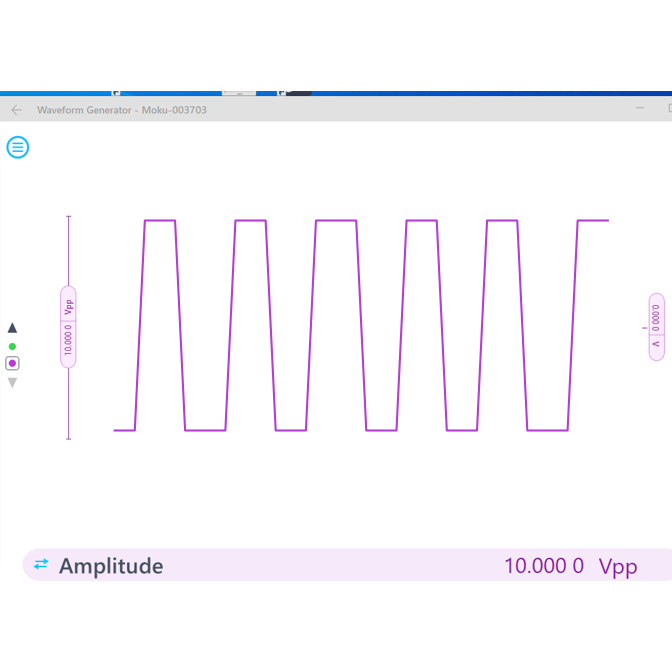

In [16]:
px = 1 / plt.rcParams["figure.dpi"]  # pixel in inches
fig, ax = plt.subplots(figsize=(700 * px, 300 * px))
plt.plot(filteredData["SEQ"].head(50), filteredData["D-Value"].head(50), color="#b43ed1")

plt.axis("off")  # this rows the rectangular frame
ax.get_xaxis().set_visible(False)  # this removes the ticks and numbers for x axis
ax.get_yaxis().set_visible(False)

plt.savefig("temp.png", bbox_inches="tight", pad_inches=0.1)
plt.close()

chart = Image.open("temp.png")

new_image = baseImage

new_image.paste(chart, (80, 200))
new_image

## Random Noise

In [61]:
noiseCharts = experimentData[experimentData["Type"] == "Noise"]
noiseFiles = noiseCharts["File"].unique()
for noise in noiseFiles:
    filteredData = noiseCharts[noiseCharts["File"] == noise]
    
    fig, ax = plt.subplots(figsize=(700 * px, 300 * px))
    plt.plot(filteredData["SEQ"].head(500), filteredData["D-Value"].head(500), color="#b43ed1")
    
    plt.axis("off")  # this rows the rectangular frame
    ax.get_xaxis().set_visible(False)  # this removes the ticks and numbers for x axis
    ax.get_yaxis().set_visible(False)
    
    plt.savefig("temp.png", bbox_inches="tight", pad_inches=0.1)
    plt.close()
    
    chart = Image.open("temp.png")
    
    new_image = baseImage
    
    new_image.paste(chart, (80, 200))
    path = noise.replace("\\", "-")
    new_image.save(f"NoiseData/{path}.png")


In [11]:
otherCharts = experimentData[experimentData["Type"] != "Noise"]

In [12]:
otherFiles = otherCharts["File"].unique()

In [19]:
for file in otherFiles:
    print(file)
    filteredData = otherCharts[otherCharts["File"] == file]
    
    fig, ax = plt.subplots(figsize=(700 * px, 300 * px))
    plt.plot(filteredData["SEQ"].head(50), filteredData["D-Value"].head(50), color="#b43ed1")
    
    plt.axis("off")  # this rows the rectangular frame
    ax.get_xaxis().set_visible(False)  # this removes the ticks and numbers for x axis
    ax.get_yaxis().set_visible(False)
    
    plt.savefig("temp.png", bbox_inches="tight", pad_inches=0.1)
    plt.close()
    
    chart = Image.open("temp.png")
    
    new_image = baseImage
    
    new_image.paste(chart, (80, 200))
    path = file.replace("\\", "-")
    print(f"{filteredData['Type'].loc[1]}Data/{path}.png")
    new_image.save(f"{filteredData['Type'].loc[1]}Data/{path}.png")

Sine Trials\1\1000Hz\1000Hz.xlsx
SineData/Sine Trials-1-1000Hz-1000Hz.xlsx.png
Sine Trials\1\100Hz\100Hz.xlsx
SineData/Sine Trials-1-100Hz-100Hz.xlsx.png
Sine Trials\1\1Hz\1Hz.xlsx
SineData/Sine Trials-1-1Hz-1Hz.xlsx.png
Sine Trials\1\200Hz\200Hz.xlsx
SineData/Sine Trials-1-200Hz-200Hz.xlsx.png
Sine Trials\1\300Hz\300Hz.xlsx
SineData/Sine Trials-1-300Hz-300Hz.xlsx.png
Sine Trials\1\400Hz\400Hz.xlsx
SineData/Sine Trials-1-400Hz-400Hz.xlsx.png
Sine Trials\1\500Hz\500Hz.xlsx
SineData/Sine Trials-1-500Hz-500Hz.xlsx.png
Sine Trials\1\600Hz\600Hz.xlsx
SineData/Sine Trials-1-600Hz-600Hz.xlsx.png
Sine Trials\1\700Hz\700Hz.xlsx
SineData/Sine Trials-1-700Hz-700Hz.xlsx.png
Sine Trials\1\800Hz\800Hz.xlsx
SineData/Sine Trials-1-800Hz-800Hz.xlsx.png
Sine Trials\10\1000Hz\1000Hz.xlsx
SineData/Sine Trials-10-1000Hz-1000Hz.xlsx.png
Sine Trials\10\100Hz\100Hz.xlsx
SineData/Sine Trials-10-100Hz-100Hz.xlsx.png
Sine Trials\10\1Hz\1Hz.xlsx
SineData/Sine Trials-10-1Hz-1Hz.xlsx.png
Sine Trials\10\200Hz\200Hz.